## Final Project Submission

Please fill out:
* Student name: 
* Student pace: self paced / part time / full time
* Scheduled project review date/time: 
* Instructor name: 
* Blog post URL:


In [3]:
import pandas as pd 
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import sklearn
from sklearn.datasets import make_classification
import sklearn.linear_model

In [9]:
def read_data(file_path):
    
    # Renaming the column heads
    column_names = ['user-id', 
                    'activity',
                    'timestamp',
                    'x-axis',
                    'y-axis',
                    'z-axis']
    
    df = pd.read_csv(file_path,
                     header=None,
                     names=column_names)
    
    # The 'z-axis' column has a ';' delimiter which must be removed 
    df['z-axis'].replace(regex=True, 
      inplace=True,
      to_replace=r';',
      value=r'')
    
    # Converting 'z-axis' to float after removal of ';'
    df['z-axis'] = df['z-axis'].apply(convert_to_float)
    
    # This is very important otherwise the model will not fit and loss
    # will show up as NAN
    df.dropna(axis=0, how='any', inplace=True)

    return df

def convert_to_float(x):

    try:
        return np.float(x)
    except:
        return np.nan
 


df = read_data('WISDM_ar_v1.1_raw.txt')
df.head(10)

,user-id,activity,timestamp,x-axis,y-axis,z-axis
0,33,Jogging,49105962326000,-0.694638,12.680544,0.503953
1,33,Jogging,49106062271000,5.012288,11.264028,0.953424
2,33,Jogging,49106112167000,4.903325,10.882658,-0.081722
3,33,Jogging,49106222305000,-0.612916,18.496431,3.023717
4,33,Jogging,49106332290000,-1.184970,12.108489,7.205164
5,33,Jogging,49106442306000,1.375655,-2.492524,-6.510526
6,33,Jogging,49106542312000,-0.612916,10.569390,5.706926
7,33,Jogging,49106652389000,-0.503953,13.947236,7.055340
8,33,Jogging,49106762313000,-8.430995,11.413852,5.134871
9,33,Jogging,49106872299000,0.953424,1.375655,1.648062


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1098203 entries, 0 to 1098203
Data columns (total 6 columns):
user-id      1098203 non-null int64
activity     1098203 non-null object
timestamp    1098203 non-null int64
x-axis       1098203 non-null float64
y-axis       1098203 non-null float64
z-axis       1098203 non-null float64
dtypes: float64(3), int64(2), object(1)
memory usage: 58.7+ MB


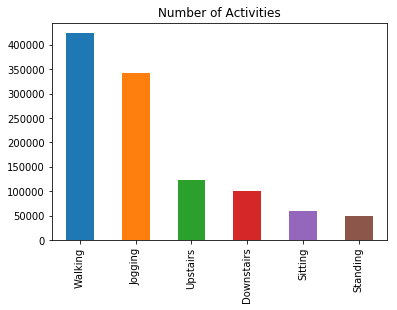

In [11]:
df['activity'].value_counts().plot(kind='bar',
                                   title='Number of Activities')
plt.show()

In [ ]:
from keras import models
from keras import layers
from keras import optimizers